<a href="https://colab.research.google.com/github/Nagaumesh/Codsoft/blob/main/Exploratory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Github link: https://github.com/Nagaumesh/Codsoft/blob/main/Exploratory_DA.ipynb

In [ ]:
# 21BDS0081----------------------K.NAGAUMESH
import pandas as pd

# Load the Dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
data = pd.read_csv(url)

# Explore Dimensions and Summary
print(data.shape)  # Dimensions
print(data.info())  # Summary of the dataset
print(data.describe())  # Statistical summary


(27820, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27

In [ ]:
# Check for Missing Values
print(data.isnull().sum())

# Data Cleaning (Fill or Drop NA values as necessary)
data = data.dropna()  # Example of dropping NA


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [ ]:

# Module 1: Introduction to EDA
# 1. Dimensions and Summary
print("Dimensions:", data.shape)
print("Data Summary:")
print(data.info())

# 2. Data Types
print("\nData Types:")
print(data.dtypes)

# Separate Data Types
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])
print("\nNumerical Data Types:")
print(numerical_data.head())
print("\nCategorical Data Types:")
print(categorical_data.head())

# 3. Measurement Scales (Example columns)
print("\nExample Measurement Scales:")
print("Nominal: country, sex")
print("Ordinal: generation")
print("Interval/Ratio: suicides_no, gdp_per_capita ($)")


Dimensions: (8364, 12)
Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8364 non-null   object 
 1   year                8364 non-null   int64  
 2   sex                 8364 non-null   object 
 3   age                 8364 non-null   object 
 4   suicides_no         8364 non-null   int64  
 5   population          8364 non-null   int64  
 6   suicides/100k pop   8364 non-null   float64
 7   country-year        8364 non-null   object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   8364 non-null   object 
 10  gdp_per_capita ($)  8364 non-null   int64  
 11  generation          8364 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 849.5+ KB
None

Data Types:
country                object
year                    int64
sex                    object
a


Duplicate Rows: 0

Missing Values Before Handling:
country                  0
year                     0
sex                      0
age                   8364
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year             0
 gdp_for_year ($)        0
gdp_per_capita ($)       0
generation               0
age_group             8364
dtype: int64

Missing Values After Handling:
country                  0
year                     0
sex                      0
age                   8364
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year             0
 gdp_for_year ($)        0
gdp_per_capita ($)       0
generation               0
age_group             8364
dtype: int64


<ipython-input-24-a9eaa6b138d2>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


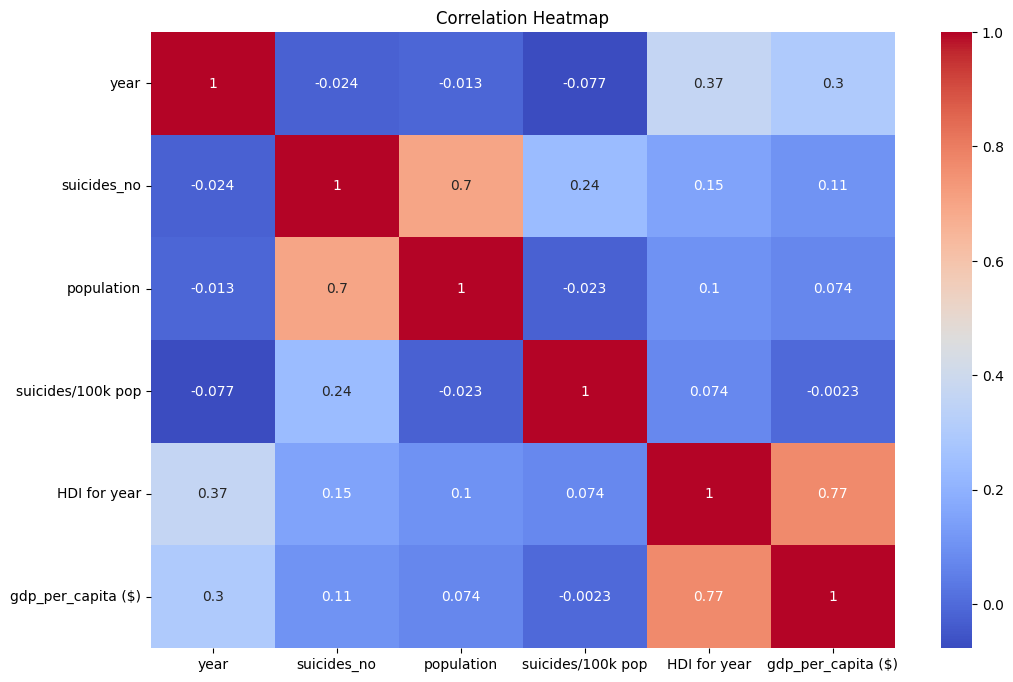

In [ ]:
# Module 2: Data Transformation
# 1. Data Deduplication
duplicates = data.duplicated().sum()
print(f'\nDuplicate Rows: {duplicates}')
data = data.drop_duplicates()

# 2. Replacing Values (example)
data['sex'] = data['sex'].replace({'Male': 'M', 'Female': 'F'})

# 3. Convert 'age' to numeric (it may contain strings)
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Discretization and Binning
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# 4. Handling Missing Data
print("\nMissing Values Before Handling:")
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)  # Forward fill as an example
print("\nMissing Values After Handling:")
print(data.isnull().sum())

# 5. Correlation Heatmap (optional for multivariate analysis)
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Univariate Analysis:


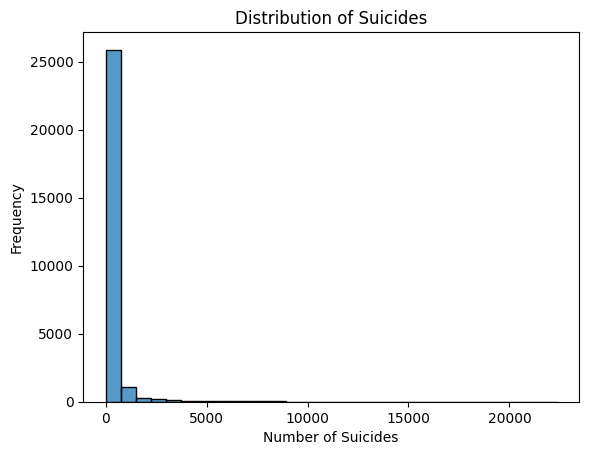

Bivariate Analysis:


<Figure size 640x480 with 0 Axes>

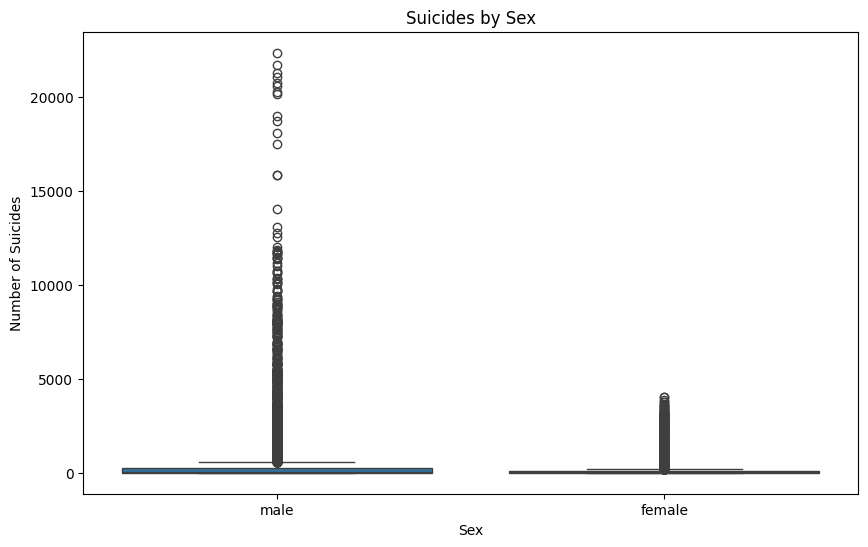

<Figure size 640x480 with 0 Axes>

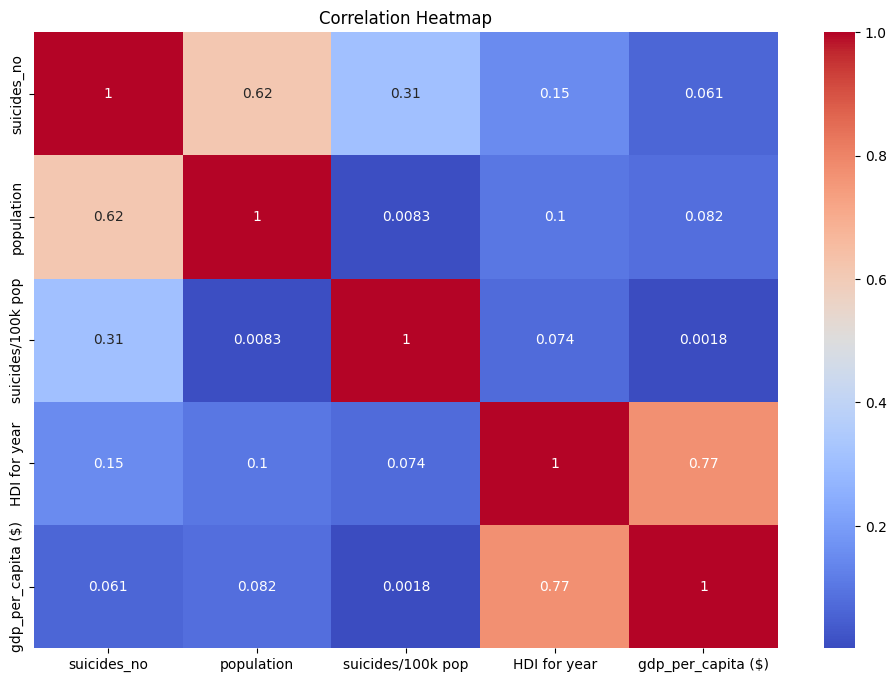

<Figure size 640x480 with 0 Axes>

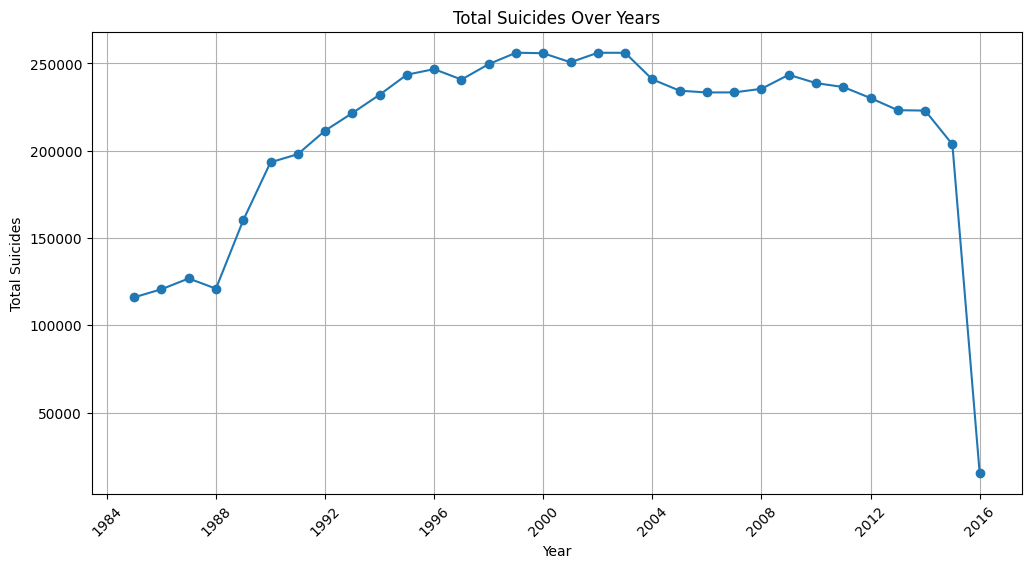

<Figure size 640x480 with 0 Axes>

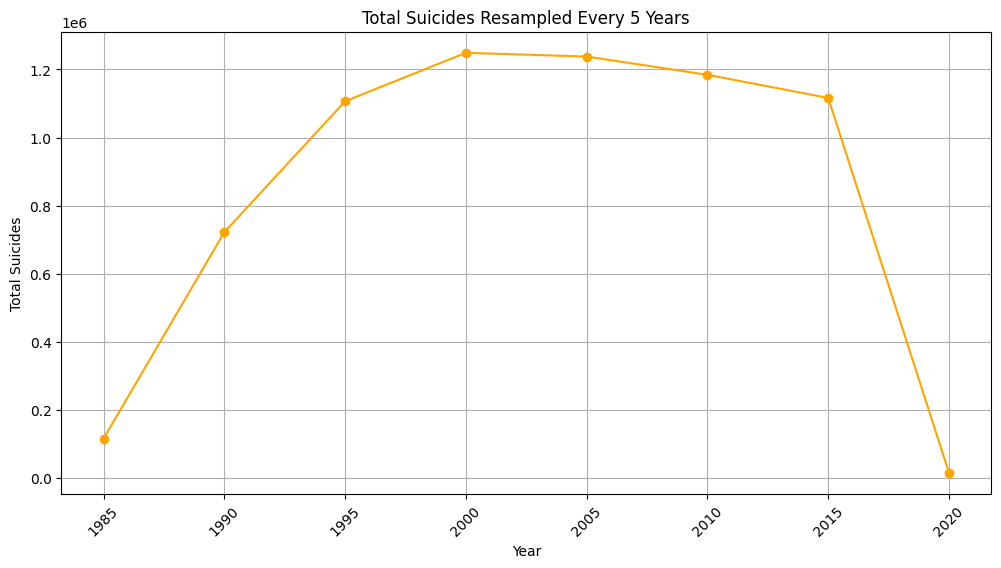

In [ ]:
# Module 3: Correlation Analysis and Time Series Analysis

# Univariate Analysis
print("Univariate Analysis:")
sns.histplot(data['suicides_no'], bins=30)
plt.title('Distribution of Suicides')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the first graph

# Bivariate Analysis
print("Bivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='suicides_no', data=data)
plt.title('Suicides by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Suicides')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the second graph

# Multivariate Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the heatmap

# Time Series Analysis
# Convert 'year' to datetime (assuming it's the time variable)
data['year'] = pd.to_datetime(data['year'], format='%Y', errors='coerce')

# Group by year and calculate total suicides
time_series_data = data.groupby(data['year'].dt.year)['suicides_no'].sum().reset_index()
time_series_data['year'] = pd.to_datetime(time_series_data['year'], format='%Y')  # Convert back to datetime

# Visualizing Time Series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['year'], time_series_data['suicides_no'], marker='o')
plt.title('Total Suicides Over Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the time series plot

# Resampling Time Series (e.g., every 5 years)
time_series_data.set_index('year', inplace=True)
resampled_data = time_series_data.resample('5Y').sum()

# Visualizing Resampled Time Series
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index.year, resampled_data['suicides_no'], marker='o', color='orange')
plt.title('Total Suicides Resampled Every 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Statistical Summary Measures:
                                year   suicides_no    population  \
count                          27820  27820.000000  2.782000e+04   
mean   2001-04-05 00:04:45.722501888    242.574407  1.844794e+06   
min              1985-01-01 00:00:00      0.000000  2.780000e+02   
25%              1995-01-01 00:00:00      3.000000  9.749850e+04   
50%              2002-01-01 00:00:00     25.000000  4.301500e+05   
75%              2008-01-01 00:00:00    131.000000  1.486143e+06   
max              2016-01-01 00:00:00  22338.000000  4.380521e+07   
std                              NaN    902.047917  3.911779e+06   

       suicides/100k pop  HDI for year  gdp_per_capita ($)  
count       27820.000000   8364.000000        27820.000000  
mean           12.816097      0.776601        16866.464414  
min             0.000000      0.483000          251.000000  
25%             0.920000      0.713000         3447.000000  
50%             5.990000      0.779000         9372.

<Figure size 640x480 with 0 Axes>

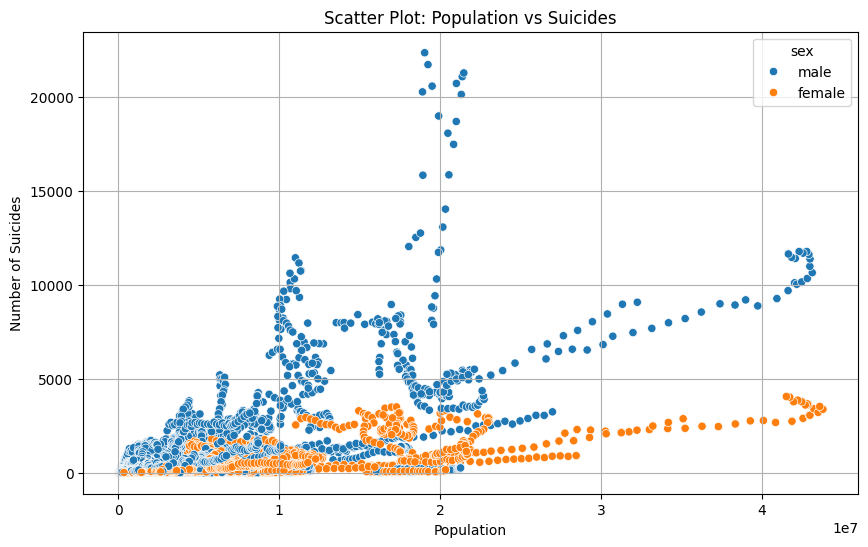

<Figure size 640x480 with 0 Axes>

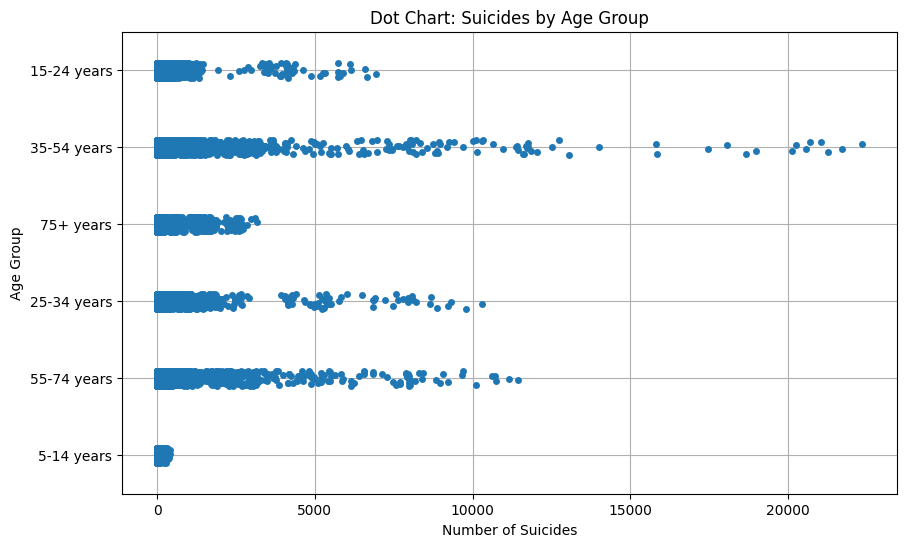

<Figure size 640x480 with 0 Axes>

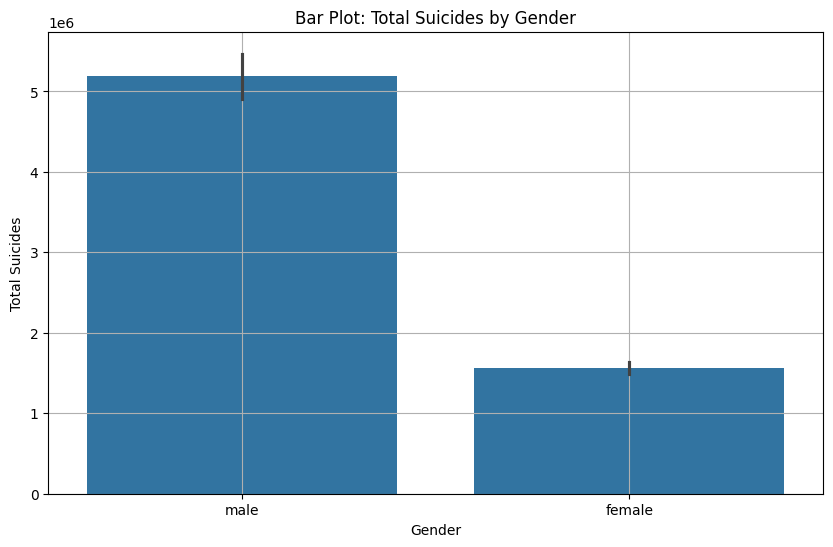

In [ ]:
# Module 4: Data Summarization and Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Statistical Summary Measures
print("Statistical Summary Measures:")
print(data.describe())
plt.subplots_adjust(hspace=2)  # Add space after the summary

# 1-D Statistical Data Analysis (e.g., Frequency Distribution)
print("\nFrequency Distribution of Suicides:")
print(data['suicides_no'].value_counts())
plt.subplots_adjust(hspace=2)  # Add space after the frequency distribution

# 2-D Statistical Data Analysis (e.g., Grouping by Gender and Age Group)
print("\n2-D Statistical Analysis (Group by Gender and Age Group):")
grouped_data = data.groupby(['sex', 'age']).agg({'suicides_no': 'sum'}).reset_index()
print(grouped_data)
plt.subplots_adjust(hspace=2)  # Add space after the grouped data

# Contingency Table
contingency_table = pd.crosstab(data['sex'], data['age'])
print("\nContingency Table (Sex vs Age):")
print(contingency_table)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='suicides_no', hue='sex', data=data)
plt.title('Scatter Plot: Population vs Suicides')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')
plt.grid()
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the scatter plot

# Dot Chart
plt.figure(figsize=(10, 6))
sns.stripplot(x='suicides_no', y='age', data=data, jitter=True)
plt.title('Dot Chart: Suicides by Age Group')
plt.xlabel('Number of Suicides')
plt.ylabel('Age Group')
plt.grid()
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the dot chart

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='suicides_no', data=data, estimator=sum)
plt.title('Bar Plot: Total Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.grid()
plt.show()

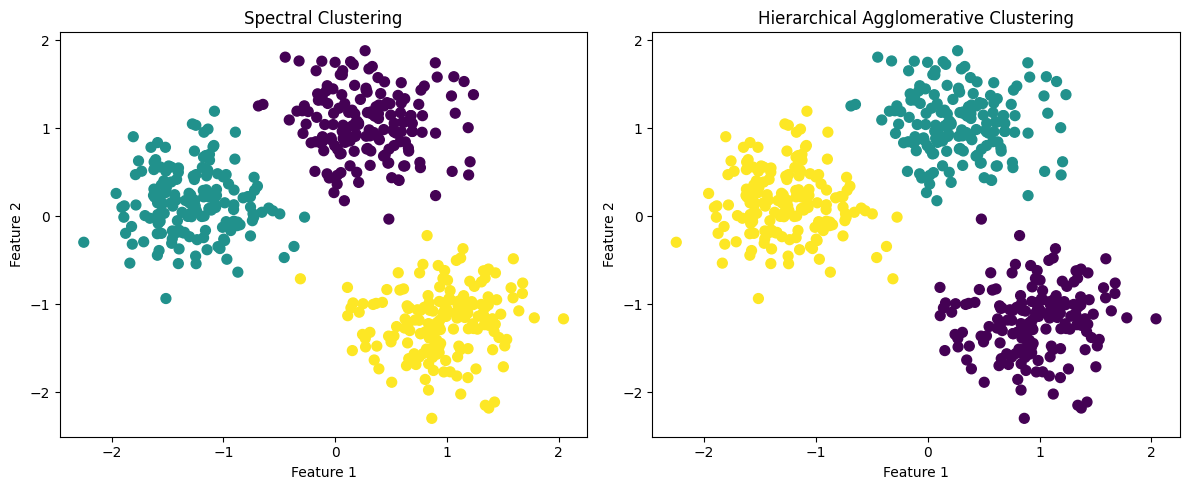

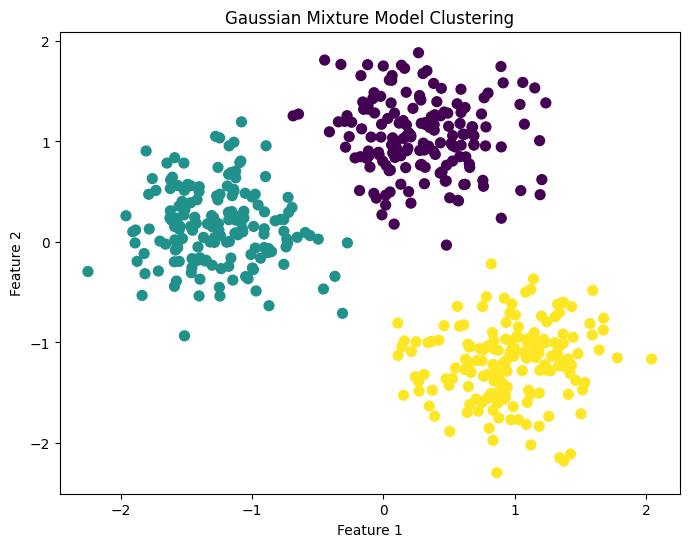

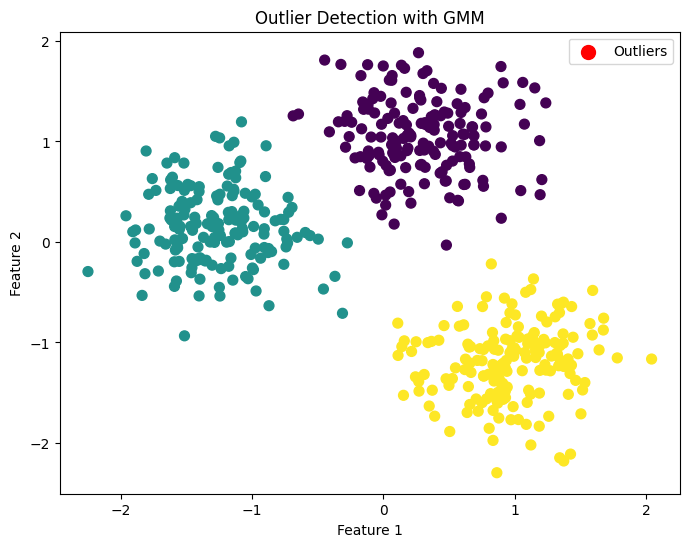

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# MODULE-5
# Create Sample Data
n_samples = 500
X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=0)

# Standardizing the Data
X = StandardScaler().fit_transform(X)

# 1. Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
labels_spectral = spectral_clustering.fit_predict(X)

# Plotting Spectral Clustering Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 2. Hierarchical Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo_clustering.fit_predict(X)

# Plotting Hierarchical Agglomerative Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='viridis', s=50)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# 3. Expectation-Maximization (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels_gmm = gmm.predict(X)

# Plotting GMM Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Outlier Detection (using GMM)
outlier_threshold = 0.1  # Define threshold for outlier detection
probs = gmm.predict_proba(X)
outliers = X[np.max(probs, axis=1) < outlier_threshold]

# Plotting Outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, label='Outliers')
plt.title('Outlier Detection with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


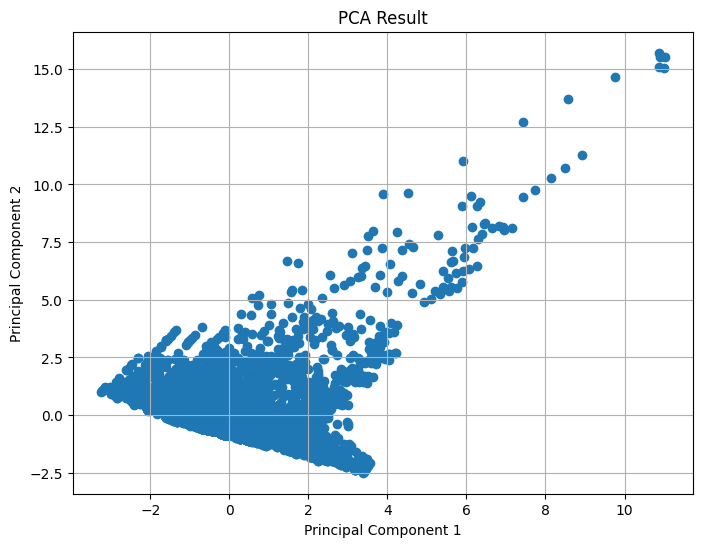

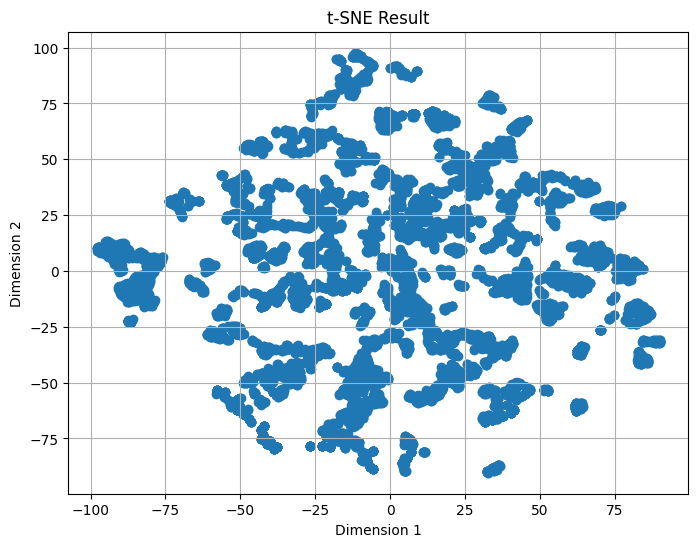

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


data.dropna(inplace=True)
data = data.select_dtypes(include=[float, int])


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 5: Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 4: Apply t-SNE (optional)
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(scaled_data)

# Step 5: Visualize t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()
plt.show()


In [ ]:
# MODULE_7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from GitHub
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
data = pd.read_csv(url)

# Step 1: Encode the target variable 'sex'
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

# Step 2: One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Step 3: Handle missing values by filling only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Step 4: Define features (X) and target (y)
X = data.drop('sex', axis=1)
y = data['sex']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6716391085549964
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2858
           1       0.68      0.63      0.65      2706

    accuracy                           0.67      5564
   macro avg       0.67      0.67      0.67      5564
weighted avg       0.67      0.67      0.67      5564

